Stock Markrt Prediction on Next Day Closing Price

The Model Training mrthod that i used in this project is Linear Regression. This is not the best model training process(Random Forest, Gradient Boosting, or LSTM) but i choosed this model training method because this is easy to understand, simple to implement, fast and efficient.

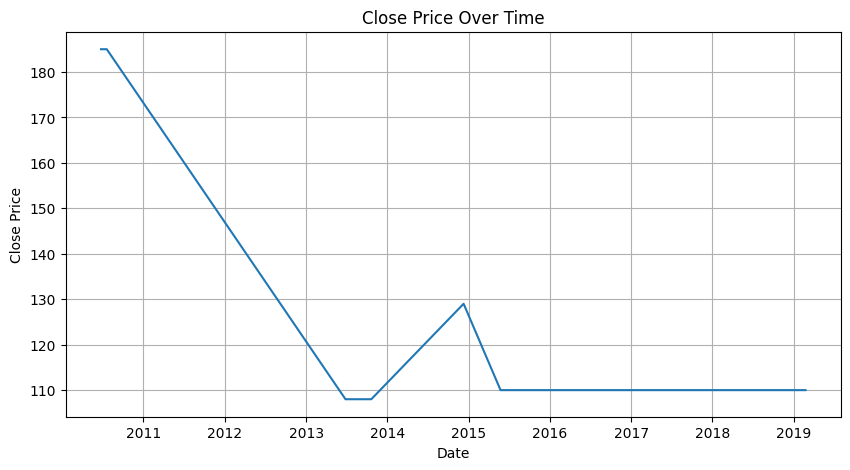

Evaluation Metrics:

MAE    : 19.4446292229143
MSE    : 501.1231197396202
RMSE   : 22.38577940880371
R²     : 0.6436457815184923
Adj R² : 1.089088554620377

Next Day Predicted Close Price for Sample 0: 163.5806495476707


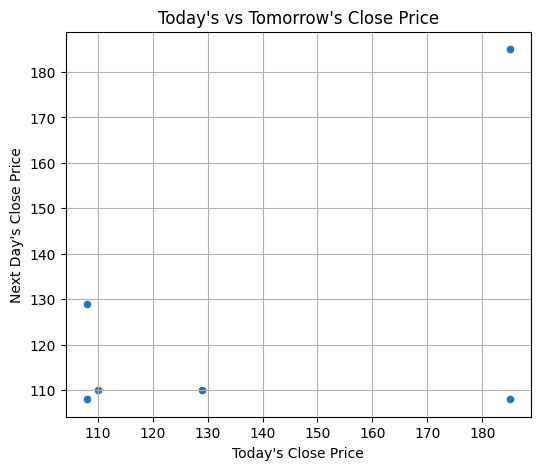

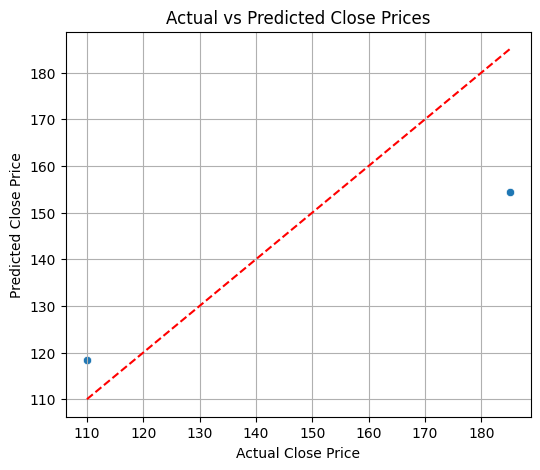

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file
file_path = "GFCLPO_2000-01-01_2021-12-31.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"CSV file not found at: {file_path}")

df = pd.read_csv(file_path)

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Next_Close_Price'] = df['Close Price'].shift(-1)
df.dropna(inplace=True)

# Plot Close Price over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Close Price')
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# Features and Target
X = df[['Close Price', 'Total Traded Shares', 'Total Traded Amount', 'Max. Price', 'Min. Price']]
y = df['Next_Close_Price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Evaluation Metrics:\n")
print("MAE    :", mae)
print("MSE    :", mse)
print("RMSE   :", rmse)
print("R²     :", r2)
print("Adj R² :", adj_r2)

# Predicting new data
new_data = pd.DataFrame([X.iloc[0]], columns=X.columns)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("\nNext Day Predicted Close Price for Sample 0:", prediction[0])

# Plot: Today's vs Tomorrow's Close Price
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Close Price', y='Next_Close_Price')
plt.title("Today's vs Tomorrow's Close Price")
plt.xlabel("Today's Close Price")
plt.ylabel("Next Day's Close Price")
plt.grid(True)
plt.show()

# Plot: Actual vs Predicted Close Price
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Ideal fit line
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.grid(True)
plt.show()

Using LSTM(Long Sort-Term Memory)

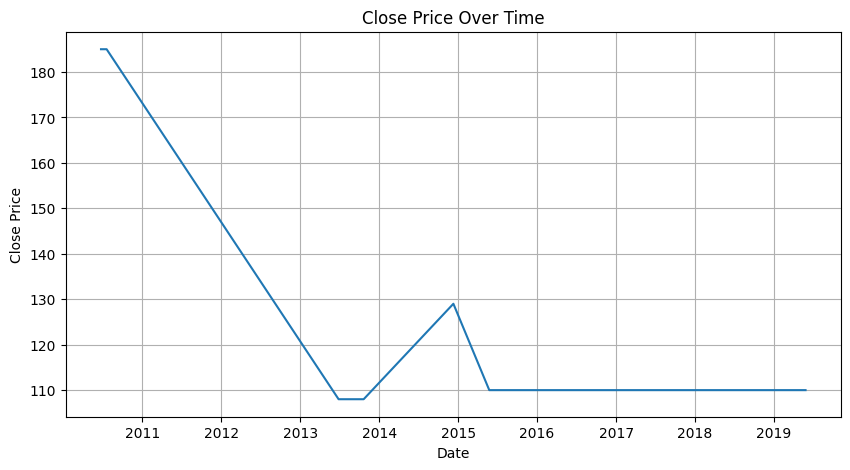

Total data rows: 11
Using sequence length: 9
Epoch 1/20


c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6.0395e-07 - val_loss: 1.9080e-04
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 6.2327e-04 - val_loss: 1.5737e-05
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.1082e-05 - val_loss: 3.8208e-04
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.4424e-04 - val_loss: 5.2221e-04
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 3.8592e-04 - val_loss: 3.2272e-04
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.8762e-04 - val_loss: 9.2896e-05
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.2727e-05 - val_loss: 1.8708e-06
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 4.2167e-05 - val_loss: 1.4600e-05
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.6404e-04 - val_loss: 2.1175e-05
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.8945e-04 - val_loss: 2.8527e-06
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.0469e-04 - val_loss: 1.1321e-05
Epoch 12/2

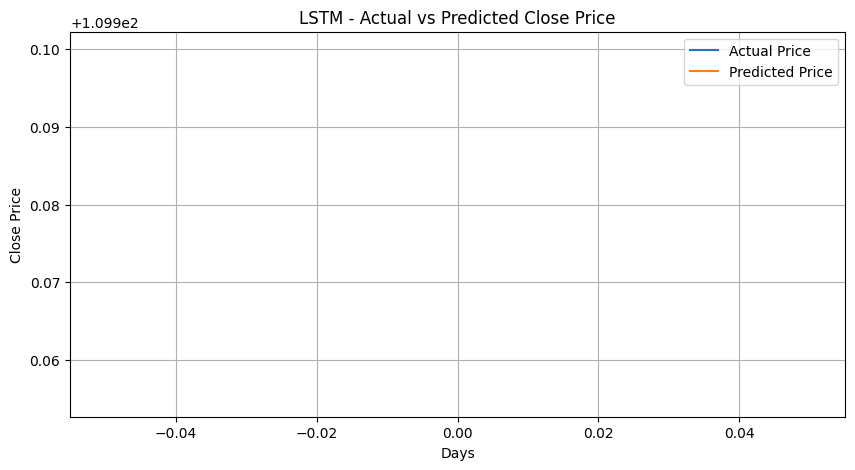


Evaluation Metrics:
MAE:  0.04506683349609375
MSE:  0.0020310194813646376
RMSE: 0.04506683349609375
R²:   nan


c:\Users\prash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file
df = pd.read_csv("GFCLPO_2000-01-01_2021-12-31.csv")

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Close Price']]
df.dropna(inplace=True)

# Plot Close Price
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Close Price')
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# Normalize the close prices
scaler = MinMaxScaler()
df['Close Price'] = scaler.fit_transform(df[['Close Price']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Dynamically determine sequence length
total_rows = len(df)
print("Total data rows:", total_rows)

sequence_length = min(10, total_rows - 2)  # Ensure at least 2 rows for split
if sequence_length < 1:
    raise ValueError("Not enough rows in CSV to proceed.")

print("Using sequence length:", sequence_length)

# Prepare data
data = df['Close Price'].values
X, y = create_sequences(data, sequence_length)

if len(X) == 0:
    raise ValueError("Still not enough data to create sequences. Please use a larger dataset.")

# Split into train and test sets
split = int(len(X) * 0.8)
if split == 0:
    raise ValueError("Training data is empty after split. Use larger dataset.")

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("LSTM - Actual vs Predicted Close Price")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print("\nEvaluation Metrics:")
print(f"MAE:  {mae}")
print(f"MSE:  {mse}")
print(f"RMSE: {rmse}")
print(f"R²:   {r2}")


Some of the errors are occured in this LSTM method because the Dataset on;y contain about 11 or 12 rows of data but you need at least~100 rows for LSTM Method so it becoms meaningful 